## **Objects & Classes**

---
When you start programming you get confronted with a lot of concepts that seem to have a meaning to most but you. However you do not need to worry about this lack of understanding for three very simple reasons.   

1. You will learn the necessary concepts as you go along,
2. quite a few of these concepts are badly understood by those that think they do (including me I suppose) 
3. a large body of these concepts are foremost of academic interest and are of little consequence in practical programming.  

The first of the concepts is perhaps the programming paradigm. In science a paradigm is a set of assumptions, concepts, values, and practices that constitutes a way of viewing reality for the community that shares them, especially in an intellectual discipline. In computer science, which is very much an intellectual discipline, it is model with which we program. There are four main models/paradigms:   

1. procedural
2. object-oriented 
3. functional 
4. logical    

Python allows you to programming procedural (scripting) and allows you to program with the object-oriented model, despite of what is sometimes said Python is not and will never be (dixit Guido van Rossum) be a functional programming language, nor wil it be logical programming language like Prolog.

This notebook teaches you the basis of programming with the object oriented model.

#### **Why object-orientation?**
Perhaps first we should answer the question why programming in the OO-model is so popular? If you DuckDuckGo for a reason why you should program in the OO-model there are many reasons that will be cited, reasons such as:

- code reusability
- information hiding
- limiting scope
- etc etc    
    
However all of the aforementioned can easily be achieved in a functional language as Haskell too. So to me, this cannot be enough of a reason for the existence of the OO-model.    
The success of the OO-model, I would suggest, is the ease with which we can model the real world in our programming. We look for traits that can represent a state and for functions that can change that state. The OO-model is as far as I am concerned not just a programming model it is also very much a design model. It would be wrong to separate these two sides of the OO-model, as we can see in the concepts of class and object.

#### **Class**   
Scottish computer scientist David Watt defines a class to be a set of similar objects, these objects share components, e.g. variables and operations. However this (correct) definition might still be very opaque for the not computer scientist. So what is a class?  

A class is model of something that exists in reality. It consists of certain traits (variables) that can hold the current state and certain operations on those traits (methods), that can change that state. A class is the design recipe for every object that belongs to it.  

#### **Object**
In the OO-model, objects are entities that combine state (the attributes/variables) behaviour (methods) and have an identity with which we can differentiate between objects.   

A class is blue print for all objects of a certain type. An object is similar to a structure (hence C++/Go use structs), but an object has enhanced features (such as member access control). An object is a member of a class and needs to be instantiated to have a memory address so that the changes in state can be stored. An object only exists in runtime, a class exists as code (in a .py file in our case) outside runtime.    

Take a coffee machine as example:

In [2]:
class CoffeeMachine:
    '''This is not how you program a class in Python!'''
    # attributes are the traits sometimes as known as variables 
    on:bool
    water_reservoir:bool
    piston:bool
    
    # the constructor which is just a method
    def __init__(self, on=False, water_reservoir=False, piston=False):
        self.on = on 
        self.water_reservoir = water_reservoir
        self.piston = piston
    
    # the operations also known as methods sometimes functions
    def switch_on(self)->None:
        if self.on:
            pass
        else:
            self.on = True
            
    def switch_off(self)->None:
        if self.on:
            self.on = False
        else:
            pass
    
    def fill_reservoir(self)->None:
        self.water_reservoir = True
    
    def fill_piston(self)->None:
        self.piston = True
    
    def make_coffee(self)->str:
        if self.on and self.water_reservoir and self.piston:
            return 'a lovely cup of coffee'
        else:
            return f'some conditions for making coffee are not met, is the machine on = {self.on} is there water = {self.water_reservoir} is there coffee = {self.piston}'         

All class based programming languages that I know, like Java, Go or C++, this is the general form of a class. 
1. attributes (traits)
2. some sort of constructor (`__init__()`) to make an object from the class 
3. several methods (operations) that change attributes or check their state
   
This has a connection with  UML where a class is designed in the following manner:   

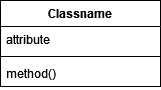

I do realize that in Python classes often appear different, from this example.    

There are a few reasons for this, most I will discuss in this notebook. I will also give you a blueprint, a sort of factory, you can use to create classes that will at least give you the same consistent feel when creating classes.    

However first we should see if our class works.

In [3]:
c = CoffeeMachine()

In [4]:
c.make_coffee()

'some conditions for making coffee are not met, is the machine on = False is there water = False is there coffee = False'

We can't make coffee, let's make coffee

In [5]:
c.switch_on();c.fill_reservoir();c.fill_piston()
c.make_coffee()

'a lovely cup of coffee'

If we make a second coffee machine object, d for instance, we again we would see we can't make coffee yet

In [6]:
d = CoffeeMachine()
d.make_coffee()

'some conditions for making coffee are not met, is the machine on = False is there water = False is there coffee = False'

in Python they way to see if two objects are the same is with `is` keyword

In [7]:
c is d

False

As discussed this way of writing a class in Python is uncommon. Usually you more likely to see the same class written as follows: 

In [9]:
class CoffeeMachineTwo:
    
    #the constructor which is just a method
    def __init__(self, on:bool=False, water_reservoir:bool=False, piston:bool=False):
        self.on = on 
        self.water_reservoir = water_reservoir
        self.piston = piston
    
    #the operations == methods
    def switch_on(self)->None:
        if self.on:
            pass
        else:
            self.on = True
            
    def switch_off(self)->None:
        if self.on:
            self.on = False
        else:
            pass
           
    def fill_reservoir(self)->None:
        self.water_reservoir = True
    
    def fill_piston(self)->None:
        self.piston = True
    
    def make_coffee(self)->str:
        if self.on and self.water_reservoir and self.piston:
            return 'a lovely cup of coffee'
        else:
            return f'some conditions for making coffee are not met, is the machine on {self.on} is there water {self.water_reservoir} is there coffee {self.piston}'        

The attributes named in the `__init__` tagged with self are the instance attributes. 

These are the attributes an object gets at creation, these attributes might come with a default value, but do not have to.

In [10]:
c2 = CoffeeMachineTwo()
c2.make_coffee()

'some conditions for making coffee are not met, is the machine on False is there water False is there coffee False'

In [11]:
c2.switch_on(),c2.fill_reservoir(),c2.fill_piston()
c2.make_coffee()

'a lovely cup of coffee'

Python is a very dynamic language, it trusts it's users to not do silly things. Silly things like breaking the design of a class

In [14]:
broken = CoffeeMachineTwo()
broken.milk = True
broken.__dict__

{'on': False, 'water_reservoir': False, 'piston': False, 'milk': True}

I perceive the possibility to randomly add attributes to a class in Python its weakest point.

If we now ask for the type of broken we see it is the same type as our class, but our class does not `milk` to have the attribute milk is to redefine the state the object can represent. 

In [16]:
type(broken)

__main__.CoffeeMachineTwo

## **Framework for designing classes**
Unfortunately there are many possibilities to "break" Python, more than a language like Java. It is for this reason that in my academic circles Python is not highly regarded as programming language. Which is a shame, I prefer Python over Java, I find Java unnecessarily verbose. 

Python is a very flexible language, Python tends to have multiple ways to tackle the same problem, making Python is a language which is easy to grasp, and quick to learn. However Python is more easily "broken", it is also more susceptible to bugs and other mistakes. This susceptibility is foremostly due to the dynamism of Python that allows for multiple solutions to a problem.      
    
Python knows several ways with which you could create a class. For instance, you could use type as meta creator of classes.

In [17]:
def afunc(self)->str:
    return f'{self.name} is a rhino!'

George = type('Wooly rhino', (), {'afunc':afunc, 'name':'George'})

In [18]:
george = George()

In [19]:
george.afunc()

'George is a rhino!'

In [20]:
type(george)

__main__.Wooly rhino

Do not create your class like this unless you need some kind of factory for classes or so. In fact I would not suggest you write classes like any example I have used so far.     

You should be explicit about the traits (attributes), when designing and programming classes. The first manner of creating a class is thus superior as far as I am concerned. However, Python has a few odities that make you not want to use this as a framework for building classes.    

For instance, Python seemingly has some difficulties differentiating class variables and instance attributes. Python also has the empty list as default value problem that creates strange behaviour. If you curious at the end of this notebook I will show you the problem, for now trust me it exists.   

One of the main selling points of Python is that it is a very well supported language; it has an active group of administrators and contributors that fix known issues within Python. With Python 3.7, Python introduced the dataclasses module, which is a kind of factory for classes. We can now create fields instead of attributes, and with that be explicit about the traits of our classes, we can solve the empty list as default value problem. (And quite a bit more as you will see shortly)    

To me it is clear this is the blueprint one should use when creating classes in Python fot it alleviates some of the fragility innate to Python. Yes there is room to discuss if this framework is not too heavy for all classes, but when you starting out in object oriented Python this framework gives you clarity. something Python often lacks.

In [21]:
from dataclasses import dataclass, field

@dataclass
class FrameWork:
    ''''fields are attributes, but they have a name and a type, the can be left empty or asigned a default value
    attributes that normally have a default value like None or [] need one now too''' 
    attribute1:str
    attribute2:int
    attribute3:float=0.0
    attribute4:list[str]=field(default_factory=list) # solves the empty list default problem
    
    
    #regular methods
    def method1(self):
        pass
    
    def method2(self):
        pass

We can create framework it is an actual class

In [22]:
fw = FrameWork('Croc', 7)
fw

FrameWork(attribute1='Croc', attribute2=7, attribute3=0.0, attribute4=[])

#### **`__init__()`**
As you see this class also has no `__init__()` defined. You often see classes with no constructor defined, for you do not need an explicit `__init__()` if you have no attributes to create & assign.    

Here however we have attributes. `@dataclass` provides us with an `__init__()` that creates and assigns the attributes/fields for us.   
There is one caveat, non-default fields always need to come before default fields, when you consider this prerequisite, it is quite logical.    

I call `__init__()` a constructor but this actually incorrect, it is only the 2nd part of object construction in Python. 
First the (class) method `__new__()` is called that creates an instance of the class, `__init__()` customizes it's behaviour by giving it attributes
methods like `__init__()` and `__new__()` are called special methods. You call these special methods with functions like `len()` and `print()`, but never access these directly. Special methods are called by the compiler. 

For instance, `__len__()` is a special method which we can call with len(arg)    

The same goes for `__init__()` we can call it with `Classname(args*)` A call to `Classname(args*)` actually activates the `__new__()` special method which Python implements automatically for you, which when finished activates the `__init__()` method after which your object has been created and only than passes control back to you.   

You can write your own `__init__()` even your own `__new__()` but why should you, better let Python do it for you. (This is not the case with all special methods)     

let's use our framework for creating the coffeemachine class

In [23]:
from dataclasses import dataclass

@dataclass
class CoffeeMachineFW:
    #attributes
    on:bool=False
    water_reservoir:bool=False
    piston:bool=False
    
    
    #methods
    def switch_on(self)->None:
        if self.on:
            pass
        else:
            self.on = True
            
    def switch_off(self)->None:
        if self.on:
            self.on = False
        else:
            pass
        
    def empty_reservoir(self)->bool:
        return self.water_reservoir
    
    def fill_reservoir(self)->None:
        self.water_reservoir = True
        
    def empty_piston(self)->bool:
        return self.piston
    
    def fill_piston(self)->None:
        self.piston = True
    
    def make_coffee(self)->str:
        if self.on and self.water_reservoir and self.piston:
            return 'a lovely cup of coffee'
        else:
            return f'some conditions for making coffee are not met, is the machine on = {self.on} is there water = {self.water_reservoir} is there coffee = {self.piston}'         

In [24]:
cfw = CoffeeMachineFW()
cfw

CoffeeMachineFW(on=False, water_reservoir=False, piston=False)

In [25]:
cfw.make_coffee()

'some conditions for making coffee are not met, is the machine on = False is there water = False is there coffee = False'

In [26]:
cfw.switch_on(),cfw.fill_reservoir(),cfw.fill_piston()
cfw.make_coffee()

'a lovely cup of coffee'

#### **Object representation in Python**
In Python there two manners in in which you represent an object. 
1. With the `__repr__()` method. This manner is meant for the target audience that is your fellow programmer.
2. with the `__str__()` method (perhaps surprisingly called with `print()`) the information about the object is now targeted at end-users.
    
An example of object representation that is meaningless and how to do it better.

In [27]:
class Rep:
    
    def __init__(self, text):
        self.text = text

In [28]:
rep = Rep('George is a rhino!')
repr(rep)

'<__main__.Rep object at 0x000002A61A153C50>'

In [29]:
print(rep)

I didn't use the framework because I wanted to show you that you don't get a lot of useful info in the old manner in which to create classes in Python, you would have to add that to your class.    

If you use the framework you get slightly better information

In [30]:
from dataclasses import dataclass, field

@dataclass
class Rep:
    text:str


In [31]:
rep = Rep(text='George is a rhino!')
repr(rep)

"Rep(text='George is a rhino!')"

This message is clearer any programmer will now know we have an object, with one attribute called text, with the value George is a rhino!
     
However if I now call print I will receive the same message

In [32]:
print(rep)

Rep(text='George is a rhino!')


I do admit this message is somewhat clearer for but perhaps not enough for end-user purposes    

We can implement our own `__str__()` method 

In [33]:
from dataclasses import dataclass, field

@dataclass
class Rep:
    text:str
    
    def __str__(self)->str:
        return f'{self.text}'


In [34]:
rep = Rep(text='George is a rhino!')
repr(rep)

"Rep(text='George is a rhino!')"

In [35]:
print(rep)

George is a rhino!


#### **class variables**
I stated that Python has difficulties to distinguish between attributes and class variables. This is not correct, for Python variables that are declared to have a value outside of __init__ are class variables and inside the init are the attributes. Python distinguishes between the two by giving them a different dictionary.   

Let me show you

In [36]:
class One:
    '''this is the One.'''
    classvar:int = 1
    
    def __init__(self, nr:int, nrstr:str)->None:
        self.nr = nr
        self.nrstr = nrstr
        
    def __repr__(self)->str:
        return f'<{self.__class__.__name__} {self.__dict__}>'

one = One(nr=2,nrstr='Three')

let's look at one a little closer

let's start with it's dict

In [37]:
one.__dict__

{'nr': 2, 'nrstr': 'Three'}

In [38]:
one.classvar

1

As you can see though we have declared classvar to be 1 we don't find it in the dict containing the intialization variables.   

What is the meaning of this as we can clearly access the variable?   

A class variable differs from an attribute because it belongs to the class, its lifespan is the runtime of the program, while the lifespan of an attribute equals that of the object it belongs to. 

We can see this if we inspect the class One instead of the object one.

In [39]:
One.__dict__

mappingproxy({'__module__': '__main__',
              '__annotations__': {'classvar': int},
              '__doc__': 'this is the One.',
              'classvar': 1,
              '__init__': <function __main__.One.__init__(self, nr: int, nrstr: str) -> None>,
              '__repr__': <function __main__.One.__repr__(self) -> str>,
              '__dict__': <attribute '__dict__' of 'One' objects>,
              '__weakref__': <attribute '__weakref__' of 'One' objects>})

The use of a class variable is simple. Sometimes you want all objects of a class to share a trait. 

For instance consider a bankaccount class, you do not want to set an interest rate per object, no you want to set it for the entire class of objects at initialization. 

In [40]:
from dataclasses import dataclass, field
from typing import ClassVar

@dataclass
class SavingsAccount:
    accountnr:str
    accountholder:str
    balance:float=0.0
    rate:ClassVar[float]=2.4
    
    def show_rate(self)->str:
        return f'the interest for your {type(self).__name__} is {self.rate}%'  
    

In [41]:
sav1 = SavingsAccount(accountnr='NL57SNB123456', accountholder='Ente')
sav2 = SavingsAccount(accountnr='NL57SNB654321', accountholder='Rhino')
sav1.show_rate()

'the interest for your SavingsAccount is 2.4%'

In [43]:
sav1.__dict__

{'accountnr': 'NL57SNB123456', 'accountholder': 'Ente', 'balance': 0.0}

In [42]:
sav2.show_rate()

'the interest for your SavingsAccount is 2.4%'

let's change the rate

In [44]:
sav1.rate=3.7
sav1.show_rate()

'the interest for your SavingsAccount is 3.7%'

what happend to the interest rate of sav2?

In [45]:
sav2.show_rate()

'the interest for your SavingsAccount is 2.4%'

Houston we have a problem, we had just decided that all saving accounts must have the same interest rate and now they don't...   

Class variables in Python should not be accessed from outside the class directly. If you do so then your class variable will become an attribute of the object you used to approach the variable. 

In [46]:
sav1.__dict__

{'accountnr': 'NL57SNB123456',
 'accountholder': 'Ente',
 'balance': 0.0,
 'rate': 3.7}

In [47]:
help(sav1)

Help on SavingsAccount in module __main__ object:

class SavingsAccount(builtins.object)
 |  SavingsAccount(accountnr: str, accountholder: str, balance: float = 0.0) -> None
 |  
 |  SavingsAccount(accountnr: str, accountholder: str, balance: float = 0.0)
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, accountnr: str, accountholder: str, balance: float = 0.0) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  show_rate(self) -> str
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotatio

If we look at the help on sav1 we can see that the class variable rate still exists. 

In fact, it has the old value 2.4 we cannot reach it with the tools I showed you so far. We need a class method (There is another method I will show you this in another notebook).

#### **class method & class variable**

The on-the-fly attribute creation is one of the reasons why Python is so flexible. People love Python for its innate flexibility, but this is also one of the main reasons Python is so fault prone when used inconsiderately.

Python created a method, the class method just so you can set and change class variables without creating an attribute. The typing library provides us with a type hint which we can use to state that a field is a class variable. So we can use our framework.

In [49]:
from dataclasses import dataclass, field
from typing import ClassVar

@dataclass
class SavingsAccount:
    accountnr:str
    accountholder:str
    balance:float=0.0
    rate:ClassVar[float]=2.4
    
    def show_rate(self)->str:
        return f'the interest for your {type(self).__name__} is {self.rate}%'  
    
    @classmethod
    def set_rate(self, rate:float):
        self.rate = rate        

In [50]:
sav1 = SavingsAccount(accountnr='NL57SNB123456', accountholder='Ente')
sav2 = SavingsAccount(accountnr='NL57SNB654321', accountholder='Rhino')
sav1.show_rate()

'the interest for your SavingsAccount is 2.4%'

In [51]:
sav2.show_rate()

'the interest for your SavingsAccount is 2.4%'

In [52]:
sav1.set_rate(3.7)
sav1.show_rate()

'the interest for your SavingsAccount is 3.7%'

In [53]:
sav2.show_rate()

'the interest for your SavingsAccount is 3.7%'

#### **The 5 Python methods**
A Python class knows 5 methods (methods outside of a class environment are called functions and only come in one flavour)
1. a regular method. 
2. a special method recognisable by the dubble underscore (dunder). 
3. a class method with the decorator `@classmethod`.
4. a static method with the decorator `@staticmethod`.
5. an abstract method with the decorator `@abstractmethod`. 

#### **special method**
A special method is one that is called implicitely by Python. This is Python’s approach to operator overloading. With that I mean you can do 3 + 4 = 7 or 3.4 + 4.5 = 7.9. The + operator is overloaded it excepts the int type and the float type. The + operator is linked with the `__add__` special method. When you write 7 + 8 the Python interpreter actually calls `__add__()`    

Python has 80 special methods, the most famous is probably `__init__()` but also `__len__()` and `__doc__()` are just a lot. Most basic maths operators are bound to a special method. `<` $\rightarrow$ `__lt__()`   While using dataclasses as in our Framework we have access to all 80 some are implemented others not and need to be overridden.   

You cannot write special methods, Python does that, but you can override (reimplement) them. Which you do infact everytime you write your own `__init__()`. We can for instance write our own string representation of a class with `__str__()`  as you have already seen.

In [ ]:
from dataclasses import dataclass, field
from typing import ClassVar

@dataclass
class SavingsAccount:
    accountnr:str
    accountholder:str
    balance:float=0.0
    rate:ClassVar[float]=2.4
    
    def show_rate(self)->str:
        return f'the interest for your {type(self).__name__} is {self.rate}%'  
    
    @classmethod
    def set_rate(self, rate:float):
        self.rate = rate        
        
    def __str__(self)->str: 
        return f'this {type(self).__name__} with number {self.accountnr} belongs to {self.accountholder}.'
        
        

In [ ]:
sav3 = SavingsAccount(accountnr='NL57SNS09876',accountholder='Rhino')
print(sav3)

#### **class methods**
Class methods are methods that have access to and only to class variables, they use the `@classmethod` decorator.
    
Like class variables class methods have a life-span equalling runtime, unlike regular methods which life-span equals that of the object it belongs to.

Class variables share the same memory address, class methods have access to that address.

In [54]:
sav1.rate is sav2.rate # the is operator checks memory location

True

In language like Java you have member access control. You cannot directly access variables that are declared private

`private static int classvariable`

Python does not know a similar mechanisme but there are ways to achieve similar behaviour, which is outside of the scope of this notebook. An easy solution is to not directly access attributes but write your own setters and getters. This however is not Pythonic

#### **static methods**
* Static methods are methods that belong to class, not to the object. Static methods don't have a self and cannot access attributes or class variables
* Static methods use the decorator `@staticmethod`
* Static methods are great to write utility methods, utility methods are an excellent tool to simplify a class and declutter it. For instance, we could use it to predict the balance of a SavingsAccount in several years time, while keeping the actual object method simple.

In [55]:
from dataclasses import dataclass, field
from typing import ClassVar

@dataclass
class SavingsAccount:
    accountnr:str
    accountholder:str
    balance:float=0.0
    rate:ClassVar[float]=0.024
    
    def show_rate(self)->str:
        return f'the interest for your {type(self).__name__} is {self.rate*100}%'  
    
    def deposit(self, amount:float)->None:
        self.balance += amount
    
    def calculate_interest_over_period(self,period=int)->float:
        '''period is measured in years'''
        return round(self.calculate_interest(balance=self.balance,rate=self.rate,period=period) - self.balance,2)
    
    @classmethod
    def set_rate(self, rate:float)->None:
        self.rate = rate        
    
    @staticmethod
    def calculate_interest(balance:float, rate:float, period=int)->float:
        '''does the actual calculation'''
        return balance * (1+rate)**period
    
    def __str__(self)->str: 
        return f'this {type(self).__name__} with number {self.accountnr} belongs to {self.accountholder}.'

In [56]:
sav4 = SavingsAccount(accountnr='NL57SNSB09090909', accountholder='George')
sav4.show_rate()

'the interest for your SavingsAccount is 2.4%'

In [57]:
sav4.deposit(5000)
sav4

SavingsAccount(accountnr='NL57SNSB09090909', accountholder='George', balance=5000.0)

In [58]:
sav4.set_rate(rate=0.02)
sav4.calculate_interest_over_period(5)

520.4

When using static methods always consider if they are really a utility (helper) method or that they should be a regular method. Be prepared during a code review to motivate your choice!

#### **abstract methods**
Python knows a fifth method called the abstract method, this is not a method belong to class/object as the previous four are. It is member of the abc module.  ABC stands for abstract base class, which is Python's manner to create an interface (In the sense of a contract, not API).    

Here I show you abstract methods briefly, in the inheritance notebook I will comment on them in greater detail. The important thing to remember is that abstract methods shouldn't be implemented and abstracted classes can't be instantiated, also remember abstract methods need to be imported and use the `@abstractmethod` decorator. 

In [59]:
from dataclasses import dataclass
from abc import ABC, abstractmethod

class Animal(ABC):
    
    @abstractmethod
    def speak(self):
        pass

@dataclass    
class Dog(Animal):
    
    def speak(self)->str:
        return f'a {type(self).__name__} says woof'

@dataclass    
class Cat(Animal):
    
    def speak(self)->str:
        return f'a {type(self).__name__} says miauw'      
    

In [60]:
dog = Dog()
cat = Cat()

In [61]:
dog.speak()

'a Dog says woof'

In [62]:
cat.speak()

'a Cat says miauw'

In [63]:
animal = Animal()

TypeError: Can't instantiate abstract class Animal with abstract method speak

#### **Your done**
To write a good class is designing that class. It requires you to think about the traits that define the class and its state and what methods you need to change that state. The FrameWork I presented you with gives you the boilerplate code that ensures you to always write a good class.

Of course now you can write a class you would want to know what to do with them, that requires continuing reading, for now there is nothing more to know about classes and objects in Python.

## **Objects in the real-world**

---
In the real-world objects are usually not that simple as the coffee machine example. They are different in the sense they are not single objects. Let me list a few of these:
 - Some objects are filled with other objects, yet they seem to be themselves without the others, they don't own them so to say. Consider a supermarket it has fruits, veggies, cookies, meat, breakfast products, cleaning products. Which are all objects but them not being in the supermarket might be a nuisance, but it would still be a supermarket. 
 - Some objects are made up of other objects, without these objects the larger object cannot exist. E.g., a car, it is made up of at least four other classes, the engine, the body, the interior, and the chassis, which themselves are made up of other classes. For instance, the engine knows pistons, a camshaft, an alternator, etc.
 - Some objects seemed to be related to one another, we can easily see a parent, a child, a sibling, a grandchild.    
 
These patterns are respectively known as:
1. aggregation
2. composition
3. inheritance     

Object-oriented programming is the Siamese twin of object-oriented design, you cannot separate them. OO design (and therefore programming) is all about rooting out those relationships on how the objects are connected. What are the patterns, how do you capture these patterns in efficient way, how do these programming patterns allow you to build bigger, better, coherent, and consistent programs.    

#### **Aggregation**
The simplest of the compounded classes is aggregation. The simplest because our object could exist and still make sense without the compounding objects. In other words when the owning object is destroyed the other objects are not. 

Let's use our FrameWork to create an aggregation

In [ ]:
from dataclasses import dataclass, field

'''I am not implementing these classes, for a MVP I do not need to'''

@dataclass
class Fridge:
    pass

@dataclass
class Hob:
    pass

@dataclass
class Sink:
    pass

@dataclass
class Oven:
    pass

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Kitchen:
    colour:str
    clean:bool
    fridge:Fridge=None
    hob:Hob=None
    sink:Sink=None
    oven:Oven=None
    coffee_machine:CoffeeMachineFW=None
    
    def __post_init__(self):
        self.fridge = Fridge()
        self.hob=Hob()
        self.sink=Sink()
        self.oven=Oven()
        self.coffee_machine=CoffeeMachineFW(on=True, water_reservoir=True,piston=True) # I have already written this class in this notebook
        
    def make_coffee(self):
        return self.coffee_machine.make_coffee()

        

In [ ]:
kitchen = Kitchen(colour='Purple', clean=True)
kitchen

The kitchen it self doesn't do anything it just captures all the objects that belong to the kitchen.    

Any operation it delegates to the specialized object thus we can make coffee in our kitchen

In [ ]:
kitchen.make_coffee()

**Aggregation** is wide spread in OO programming for instance it is how you present objects to the user. The application programming interface (API) is an example aggregation.   

With the kitchen I offer a full range of services to my client, he can cook on the hob, bake in the oven, make coffee etc. But notice how this is done without knowing the implementation of the object that perform the operation i.e., make coffee.     

This is known as **encapsulation**, encapsulation is the bundeling of data and methods (true in Python) and limiting access to some data (not true in Python). As a client you do not need to know how the coffee is made just that you can make it. 

This class is tightly coupled, there are ways around this, for instance via dependency injection, this something for the design/SOLID notebook

#### **Composition** 
Object composition is about combining objects within an object to use the functionality of the objects to create the functionailty of the larger object. This while ensuring the encapsulation of the combining objects.   

The big difference between **aggregation** and **composition** is that the latter couldn't function without the objects it is composed of. Take a bicycle as example, it is composed of several objects, for instance, a saddle, wheel, frame, you can't leave one of these off for without these there simply would not be a bicycle.    

Object composition in UML looks like:   
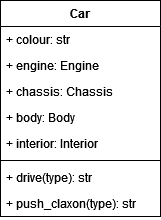

Where Engine, Chassis, Body, and Interior are objects. In UML objects are given a capital letter, so you should read this, we have an attribute with as type an object i.e engine:Engine

let's use our Framework for building classes to build a car

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Engine:
    running:bool=False
    
    def start(self)->None:
        self.running=True
        
    def stop(self)->None:
        self.running=False


In [ ]:
from dataclasses import dataclass, field

@dataclass
class Chassis:
    wheels:int
    brakes:bool=False
    accelerator:bool=False
    
    def brake(self)->str:
        self.brakes=True
        return 'slowing down'
    
    def accelerating(self)->str:
        self.accelerator=True
        return 'speeding up'

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Body:
    colour:str
    body_type:str
    windows_closed:bool=True
    doors_open:bool=False
    
    def open_doors(self)->str:
        self.doors_open=True
        return 'Hurry the doors are open it is cold outside' 
    
    def open_windows(self)->str:
        self.windows_closed=False
        return 'Blimey it is hot outside, luckily the windows are open'

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Interior:
    seats:int 
    speedometer:int
    
    @dataclass
    class Dashboard:
        speedometer:int
        claxon:str
        
        def push_claxon(self)->str:
            return self.claxon
        
        def read_speedo(self)->int:
            return self.speedometer
        
    def __post_init__(self):
        self.dashboard = self.Dashboard(speedometer=self.speedometer, claxon='Tuut tuut')
        
    def honk(self)->str:
        return self.dashboard.push_claxon()
    
    def how_fast(self)->int:
        return self.dashboard.read_speedo()



In [ ]:
from dataclasses import dataclass, field

@dataclass
class Car:
    
    colour:str
    body_type:str
    speed:int
    seats:int=4
    wheels:int=4
    
    engine:Engine=None
    chassis:Chassis=None
    body:Body=None
    interior:Interior=None
    
    def __post_init__(self):
        self.engine   = Engine()
        self.chassis  = Chassis(wheels=self.wheels)
        self.body     = Body(colour=self.colour, body_type=self.body_type)
        self.interior = Interior(seats=self.seats,speedometer=self.speed)
    
    def start_car(self)->None:
        self.engine.start()
    
    def stop_car(self)->None:
        self.engine.stop()
        
    def accelerate(self)->str:
        if self.engine.running:
            return self.chassis.accelerating()
        else:
            'You need to start the car before it can accelerate'
            
    def brake(self)->str:
        if self.engine.running:
            return self.chassis.brake()
        else:
            return 'We do not need to brake, the engine isn`t running'
        
    def open_doors(self)->str:
        if not self.body.doors_open:
            return self.body.open_doors()
        else:
            return 'The doors are already open'
        
    def open_windows(self)->str:
        if self.body.windows_closed:
            return self.body.open_windows()
        else:
            return 'The windows are already down'
        
    def push_claxon(self)->str:
        return self.interior.honk()
    
    def read_speedo(self)->str:
        return f'You are currently driving at {self.interior.how_fast()} kilometers an hour'
    
    
    
    
        

Before you play with class and try out the functionality of Car a few remarks:
1. In general you would never program all classes in one file, but in five in this case and have Car importing Engine cum suis
2. In Interior you find an interior class, could not resist the pun, we better call it an inner class, Dashboard. A dashboard is part the interior and does not make any sense outside the interior, yet it is a complicated thing with operations, there for it deserves its own class. These are the questions you should ask yourself if you write a complicated class, are there complicated objects in my class that have operations, if the answer is yes. Ask if it make sense that lives outside of your class, should it live on if your object is gone. If the answer is no, you should write an inner class, otherwise use object composition.
3. Especially when using object composition, you might want to first initialize the outer object before initializing the inner objects, for instance because you need some attribute, like I need body_type, colour, and speed from the car object. @dataclass offers you __post_init__() which allows you to initialize some attributes (or a method if you want) directly after the object is created by the compiler, before control is handed back to you.    

Now go and play! (Btw this is good class to test with Pytest as an exercise, but you need to take the code out of this notebook)


#### **Inheritance**
There are in general two reasons you want to use inheritance.
 1. To create a subtype (I shall not discuss it here)
 2. to avoid code duplication by reuse    
 
The example is about code reuse and how to do that clearly, so other people know what is going on, something that isn't always clear with inheritance

In [ ]:
from dataclasses import dataclass, field

@dataclass
class BankAccount:
    accountnr:str
    accountholder:str
    balance:float=0.0
    
    def deposit(self,amount:float)->None:
        self.balance += amount
        
    def show_balance(self)->str:
        return f'{self.balance}'
    
    def __str__(self)->str:
        return f'{type(self).__name__} with number {self.accountnr} is held by {self.accountholder} the current balance is {self.balance} euro.'
    

In [ ]:
bankaccount = BankAccount(accountnr='NL57SNSB666666', accountholder='Pheebs')
bankaccount

In [ ]:
bankaccount.deposit(4000)
bankaccount.show_balance()

In [ ]:
print(bankaccount)

Our base class works, let's give it some children

In [ ]:
from dataclasses import dataclass, field
from typing import ClassVar

@dataclass
class SavingsAccount(BankAccount):
    rate:ClassVar[float]=0.0
    
    @classmethod
    def set_rate(self, rate:float)->None:
        self.rate = rate
    
    

In [ ]:
savingsaccount = SavingsAccount(accountnr='NL37ASNB343434', accountholder='George')
savingsaccount

As SavingsAccount is a subclass of BankAccount you can use it's attributes and methods

In [ ]:
issubclass(SavingsAccount,BankAccount)

In [ ]:
savingsaccount.deposit(2000)
savingsaccount.show_balance()

In [ ]:
print(savingsaccount)

#### **`super()`**
This not the way to use the functionality from the base class. You should make it explicit by using the `super()` function which creates a proxy object to call the base class' method on (it is a bit more complicate see the inheritance notebook)

In [ ]:
from dataclasses import dataclass

@dataclass
class CurrentAccount(BankAccount):
    ''' A bankaccount for daily use'''
    limit:int=0
    overdraft:bool=False
    
    def deposit(self, amount:float)->None:
        super().deposit(amount)
        
    def show_balance(self)->str:
        return super().show_balance()
    
    def set_overdraft(self)->None:
        self.overdraft = True
        
    def set_limit(self, limit:int)->None:
        self.limit=limit
        
    def __str__(self)->str: # this method overrides the one from BankAccount
        return f'{type(self).__name__} has a overdraft limit of {self.limit} euro.'
        
    

In [ ]:
current = CurrentAccount(accountnr='NL12INSINGER0808008', accountholder='Croc')
current

In [ ]:
current.deposit(25000)
current.show_balance()

In [ ]:
current.set_overdraft()
current.set_limit(1000000)
print(current)

You can see what is the actual order in which methods are called if you call on the help of a class.
You will see the MRO of the object you call help on, MRO stands for method resolution order 

In [ ]:
help(current)

There is a lot to say about inheritance in general in for Python specific. See the inheritance notebook for details.
For now there are only two things I want to say about it:
 1. When you want to use inheritance consider if you should not be using object composition, but remember Python favours inheritance
 2. use `super()` instead of implicitely using the base class' methods!!!

#### **The empty list as default value problem**
As promised I would show you the empty list as default problem. There is a lot to say more about this, but I just want to show you the problem. (I talk about similar problems in another notebook, programming concepts) 

The basis of this problem lies in the fact that Python only knows two storables (things that you can store) these are either primitives (int, float, etc) or a pointer. A pointer points (hence the name) to a location in memory.

In [ ]:
class Taxi:
    '''Class to illustrate the empty default list problem'''
    
    def __init__(self, passengers=[]): # de taxi is initieel leeg
        self.passengers=passengers
        
    def pick_up(self,name:str):
        self.passengers.append(name)
    
    def drop_off(self,name:str):
        self.passengers.remove(name)  

Let's make a taxi

In [ ]:
taxi_one = Taxi(passengers=['Ente', 'Croc'])
taxi_one.passengers

In [ ]:
taxi_one.drop_off('Ente')
taxi_one.passengers

In [ ]:
taxi_one.pick_up('Rhino')
taxi_one.passengers

so far the taxi class works as it supposed to do. But I have a few taxi's and really would like to instantiate them at the same time, before their shift begins

In [ ]:
taxi_two = Taxi()
taxi_three= Taxi()
taxi_two.passengers

In [ ]:
taxi_three.passengers

Both lists are empty, so far so good let's pick up a passenger

In [ ]:
taxi_two.pick_up('George')
taxi_two.passengers

Now taxi_three should have no passengers, we have done nothing with taxi_three

In [ ]:
taxi_three.passengers

However George got in that taxi too, he is very spooky. Let's get rid of George taxi_three!

In [ ]:
taxi_three.drop_off('George')
taxi_two.passengers

Bye bye George! George has gone from both taxi's indeed a spooky relationship

This is quite the nefarious problem, and not simple to solve if your Python. The root cause is that Python has two storables, primitives and pointers.    

What happens is that both taxi_two and taxi_three passenger list points to the same memory location, if you do an operation on that list both taxis will have the result of that operation, for it is the same list. The class is after all defined with an empty list as a default. Taxi_one overrides this by using its own list at creation and does not have this problem.    

Now for Python to solve this would not be easy this is very deep in the core of Python. So, they created a work around a solution for wanting to instantiate objects with empty lists, dataclasses' field function.

Let's use our framework to build the same class.

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Taxi:
    passengers:list[str]= field(default_factory=list)
    
    def pick_up(self,name:str):
        self.passengers.append(name)
    
    def drop_off(self,name:str):
        self.passengers.remove(name)
    

In [ ]:
type(Taxi().passengers)

In [ ]:
taxi_one = Taxi(passengers=['Ente', 'Croc'])
taxi_one.passengers

In [ ]:
taxi_two = Taxi()
taxi_three = Taxi()

In [ ]:
taxi_two.pick_up('George')
taxi_two.passengers

In [ ]:
taxi_three.passengers

#### **Problem solved**

There is few more things you could learn about classes and objects in general and Python specific, but these are technical & historical details a programmer can do without. There is however a lot more to learn about object oriented programming, subjects that include:
 - Inheritance
 - Interfaces 
 - Design & SOLID
 - Typing 
 - Generic programming (advanced topic) 